<a href="https://colab.research.google.com/github/Jiehuang1102/coding-two-advanced-frameworks/blob/main/Jie_Huang_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files

# 上传本地文件到Colab
uploaded = files.upload()

# 打印上传文件的名称
for filename in uploaded.keys():
    print(f'文件 "{filename}" 已上传')


Saving Anhui_housing_prices.csv to Anhui_housing_prices.csv
文件 "Anhui_housing_prices.csv" 已上传


In [13]:
import os

# 查看/content目录下的文件
uploaded_files = os.listdir('/content')

# 打印已上传文件的路径
for file in uploaded_files:
    print(f'文件路径: /content/{file}')


文件路径: /content/.config
文件路径: /content/Anhui_housing_prices.csv
文件路径: /content/california_housing_train.csv
文件路径: /content/sample_data


In [15]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


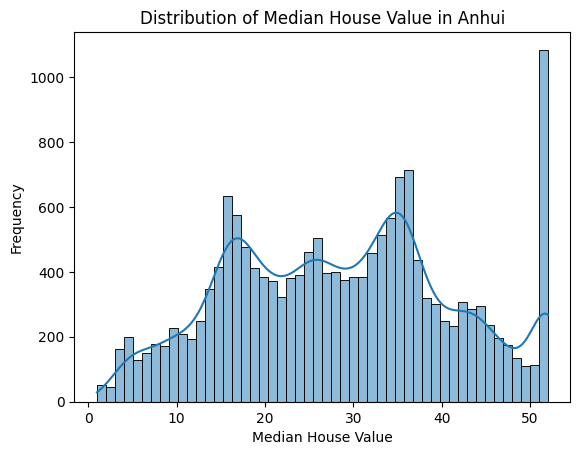

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['housing_median_age'], bins=50, kde=True)
plt.title('Distribution of Median House Value in Anhui')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


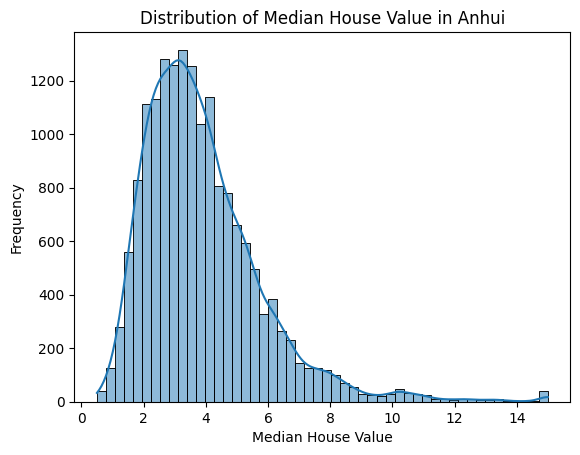

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['median_income'], bins=50, kde=True)
plt.title('Distribution of Median House Value in Anhui')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


In [19]:
# 示例：用中位数填充缺失值
df.fillna(df.median(), inplace=True)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('median_income', axis=1))


In [22]:
from sklearn.model_selection import train_test_split

X = scaled_features
y = df['median_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 1.078467886374747


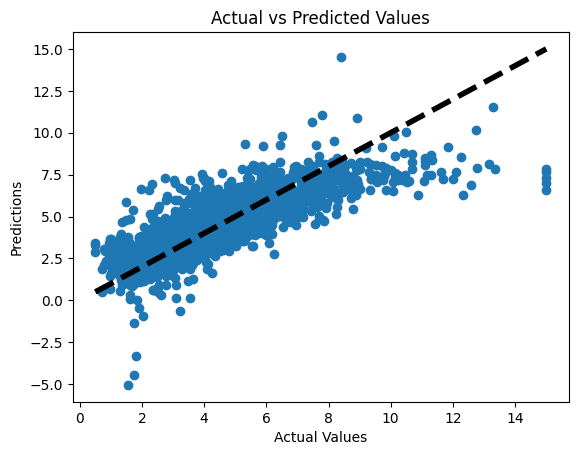

In [25]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
